<a href="https://colab.research.google.com/github/jasonbai/scorecardpy/blob/master/Scorecard_Development_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

很久没有关注谢博士的Scorecard的更新，在朋友圈看到他已经开发了Python版本的package便于大家开发评分卡。最近正好也看一些Python的东西，就把这个package拿来学习一下，顺便可以帮忙一些新人使用。

> 由于之前Scorecard的package都是基于R开发的，相关的教程及说明文档主要为R，但基本逻辑都是完全一致的，可以通过前面的一些说明了解学习

### 项目链接：

主页：http://shichen.name/scorecard/

* Scorecard Development in Python  GitHub地址：https://github.com/ShichenXie/scorecardpy
* Scorecard Development in R  GitHub地址：https://github.com/ShichenXie/scorecard
* 说明文档（R版） http://shichen.name/slide/20171115scorecard/#1

### 功能说明：

>The goal of scorecard package is to make the development of traditional credit risk scorecard model easier and efficient by providing functions for some common tasks.

> * data partition (split_df)
* variable selection (iv, var_filter)
* weight of evidence (woe) binning (woebin, woebin_plot, woebin_adj, woebin_ply)
* scorecard scaling (scorecard, scorecard_ply)
* performance evaluation (perf_eva, perf_psi)

主要是提升对传统信用评分卡模型开发(逻辑回归）更加快捷高效，封装了如数据样本切分（train、test）、初级的数据清洗、变量选择、变量分箱、Woe转换、评分刻度转换及PSI的计算。

### 安装
Installation
Install the release version of scorecardpy from PYPI with:

```pip install scorecardpy```

Install the latest version of scorecardpy from github with:

```pip install git+git://github.com/shichenxie/scorecardpy.git```

### 1.导入包

In [0]:
# 安装包
!pip install scorecardpy

    100% |████████████████████████████████| 61kB 4.1MB/s 
  Running setup.py bdist_wheel for scorecardpy ... - \ done
  Stored in directory: /root/.cache/pip/wheels/9d/bb/1b/057d286ee8ebb34714b4004b13f4dc71b619b41f7868cf6f98
Successfully built scorecardpy


In [0]:
# Traditional Credit Scoring Using Logistic Regression
import scorecardpy as sc

### 2.导入数据

In [0]:
# data prepare ------
# load germancredit data
dat = sc.germancredit()

In [0]:
dat.shape

(1000, 21)

In [0]:
dat.head(3)

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good


Scorecardpy内集成了一个数据集germancredit，即German credit dataset，是信用评级建模中常用的测试数据集，共有1000条数据，每条数据20个特征。

### 3.变量初筛

In [0]:
# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(dat, y="creditability")

/usr/local/lib/python3.6/dist-packages/scorecardpy/condition_fun.py:101: UserWarning: The positive value in "creditability" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


sc.var_filter 函数提供了变量粗筛功能，默认删除信息值<0.02、缺失率>95%、单类别比例>95%的变量，同时对y变量"creditability"进行了1，0转换。

Signature: sc.var_filter(dt, y, x=None, iv_limit=0.02, missing_limit=0.95, identical_limit=0.95, var_rm=None, var_kp=None, return_rm_reason=False, positive='bad|1')
Docstring:
Variable Filter
------
This function filter variables base on specified conditions, such as 
information value, missing rate, identical value rate.

Params
------
dt: A data frame with both x (predictor/feature) and y 
  (response/label) variables.
y: Name of y variable.
x: Name of x variables. Default is NULL. If x is NULL, then all 
  variables except y are counted as x variables.
iv_limit: The information value of kept variables should>=iv_limit. 
  The default is 0.02.
missing_limit: The missing rate of kept variables should<=missing_limit. 
  The default is 0.95.
identical_limit: The identical value rate (excluding NAs) of kept 
  variables should <= identical_limit. The default is 0.95.
var_rm: Name of force removed variables, default is NULL.
var_kp: Name of force kept variables, default is NULL.
return_rm_reason: Logical, default is FALSE.
positive: Value of positive class, default is "bad|1".

Returns
------
DataFrame
    A data.table with y and selected x variables
Dict(if return_rm_reason == TRUE)
    A DataFrame with y and selected x variables and 
      a DataFrame with the reason of removed x variable.

Examples
------
import scorecardpy as sc

# load data
dat = sc.germancredit()

# variable filter
dt_sel = sc.var_filter(dat, y = "creditability")
File:      c:\programdata\anaconda3\lib\site-packages\scorecardpy\var_filter.py
Type:      function

### 4. 建模样本切分

In [0]:
# breaking dt into train and test
train, test = sc.split_df(dt_s, 'creditability').values()

split_df函数可随机将样本分层切分为训练集与测试集，默认7:3比例。

Signature: sc.split_df(dt, y=None, ratio=0.7, seed=186)
Docstring:
Split a dataset
------
Split a dataset into train and test

Params
------
dt: A data frame.
y: Name of y variable, default is NULL. The input data will split 
    based on the predictor y, if it is provide.
ratio: A numeric value, default is 0.7. It indicates the ratio of 
    total rows contained in one split, must less than 1.
seed: A random seed, default is 186.

Returns
------
dict
    a dictionary of train and test

Examples
------
import scorecardpy as sc

# load data
dat = sc.germancredit()

# split train and test
train, test = sc.split_df(dat, 'creditability').values()

# set ratios for both train and test
train2, test2 = sc.split_df(dat, 'creditability', ratio = [0.5, 0.2]).values()
File:      c:\programdata\anaconda3\lib\site-packages\scorecardpy\split_df.py
Type:      function

### 5.分箱WOE转换

#### 分箱:

在评分卡建模中，变量分箱（binning）是对连续变量离散化（discretization）的一种称呼。要将logistic模型转换为标准评分卡的形式，这一环节是必须完成的。信用评分卡开发中一般有常用的等距分段、等深分段、最优分段。

其中等距分段（Equval length intervals）是指分段的区间是一致的，比如年龄以十年作为一个分段；等深分段（Equal frequency intervals）是先确定分段数量，然后令每个分段中数据数量大致相等；最优分段（Optimal Binning）又叫监督离散化（supervised discretizaion），使用递归划分（Recursive Partitioning）将连续变量分为分段，背后是一种基于条件推断查找较佳分组的算法（Conditional Inference Tree）

####  WOE转换:
证据权重(Weight of Evidence, WOE)转换可以将logistic回归模型转变为标准评分卡格式。该转换过程能够简化模型的应用且增加业务解释性，同时能将特征与标签之间的非线性关系转化为线性的。scorecard::woebin函数提供了tree与chimerge两种分箱方法。

In [0]:
# woe binning ------
bins = sc.woebin(dt_s, y="creditability")

Signature:
sc.woebin(
    ['dt', 'y', 'x=None', 'breaks_list=None', 'special_values=None', 'min_perc_fine_bin=0.02', 'min_perc_coarse_bin=0.05', 'stop_limit=0.1', 'max_num_bin=8', "positive='bad|1'", 'no_cores=None', 'print_step=0', "method='tree'"],
)

woebin函数tree方法分箱的原理类似决策树过程。 不同的变量类型的分箱过程稍有差异。常见的变量类型包括数值型、类别型、有序类别型三类，分别对应R中的numeric、character、factor。

数值型变量首先需等距细分段，通过min_perc_fine_bin参数控制，默认值为0.02，即初始等距分为50段。且极值*单独分段。

对于类别变量，根据每个类别变量的坏客户率排序。

通过上面两步连续变量与类别变量均转换为有序类别变量。

最后，采用贪心算法逐步搜索使得信息值最大且新增分箱中样本占比(min_perc_coarse_bin)不小于5%的分箱点。

分箱过程的停止条件是信息增益率(stop_limit)小于0.1与最大分箱数(max_num_bin)大于8。

woebin函数chimerge分箱为自底向上的数据离散化方法，即将具有最小卡方值的相邻区间合并在一起。具体内容参见chimerge算法或原论文ChiMerge:Discretization of numeric attributs


Docstring:
WOE Binning
------
`woebin` generates optimal binning for numerical, factor and categorical variables 
using methods including tree-like segmentation or chi-square merge. 
woebin can also customizing breakpoints if the breaks_list or special_values was provided.
The default woe is defined as ln(Distr_Bad_i/Distr_Good_i). If you 
prefer ln(Distr_Good_i/Distr_Bad_i), please set the argument `positive` 
as negative value, such as '0' or 'good'.

Params
------
dt: A data frame with both x (predictor/feature) and y (response/label) variables.
y: Name of y variable.
x: Name of x variables. Default is NULL. If x is NULL, 
  then all variables except y are counted as x variables.
breaks_list: List of break points, default is NULL. 
  If it is not NULL, variable binning will based on the 
  provided breaks.
special_values: the values specified in special_values 
  will be in separate bins. Default is NULL.
min_perc_fine_bin: The minimum percentage of initial binning 
  class number over total. Accepted range: 0.01-0.2; default 
  is 0.02, which means initial binning into 50 fine bins for 
  continuous variables.
min_perc_coarse_bin: The minimum percentage of final binning 
  class number over total. Accepted range: 0.01-0.2; default 
  is 0.05.
stop_limit: Stop binning segmentation when information value 
  gain ratio less than the stop_limit, or stop binning merge 
  when the minimum of chi-square less than 'qchisq(1-stoplimit, 1)'. 
  Accepted range: 0-0.5; default is 0.1.
max_num_bin: Integer. The maximum number of binning.
positive: Value of positive class, default "bad|1".
no_cores: Number of CPU cores for parallel computation. 
  Defaults NULL. If no_cores is NULL, the no_cores will 
  set as 1 if length of x variables less than 10, and will 
  set as the number of all CPU cores if the length of x variables 
  greater than or equal to 10.
print_step: A non-negative integer. Default is 1. If print_step>0, 
  print variable names by each print_step-th iteration. 
  If print_step=0 or no_cores>1, no message is print.
method: Optimal binning method, it should be "tree" or "chimerge". 
  Default is "tree".

Returns
------
dictionary
    Optimal or customized binning dataframe.

Examples
------
import scorecardpy as sc
import pandas as pd

# load data
dat = sc.germancredit()

# Example I
# binning of two variables in germancredit dataset
bins_2var = sc.woebin(dat, y = "creditability", 
  x = ["credit.amount", "purpose"])

# Example II
# binning of the germancredit dataset
bins_germ = sc.woebin(dat, y = "creditability")

# Example III
# customizing the breakpoints of binning
dat2 = pd.DataFrame({'creditability':['good','bad']}).sample(50, replace=True)
dat_nan = pd.concat([dat, dat2], ignore_index=True)

breaks_list = {
  'age.in.years': [26, 35, 37, "Inf%,%missing"],
  'housing': ["own", "for free%,%rent"]
}
special_values = {
  'credit.amount': [2600, 9960, "6850%,%missing"],
  'purpose': ["education", "others%,%missing"]
}

bins_cus_brk = sc.woebin(dat_nan, y="creditability",
  x=["age.in.years","credit.amount","housing","purpose"],
  breaks_list=breaks_list, special_values=special_values)
File:      c:\anaconda3\lib\site-packages\scorecardpy\woebin.py
Type:      function

{'age.in.years': <matplotlib.figure.Figure at 0x7f20f8d6cc88>,
 'credit.amount': <matplotlib.figure.Figure at 0x7f20f861b9b0>,
 'credit.history': <matplotlib.figure.Figure at 0x7f20f6bfe668>,
 'duration.in.month': <matplotlib.figure.Figure at 0x7f20f6bae320>,
 'housing': <matplotlib.figure.Figure at 0x7f20f6ad3a90>,
 'installment.rate.in.percentage.of.disposable.income': <matplotlib.figure.Figure at 0x7f20f6a6a710>,
 'other.debtors.or.guarantors': <matplotlib.figure.Figure at 0x7f20f697ce80>,
 'other.installment.plans': <matplotlib.figure.Figure at 0x7f20f6914860>,
 'personal.status.and.sex': <matplotlib.figure.Figure at 0x7f20f689eb38>,
 'present.employment.since': <matplotlib.figure.Figure at 0x7f20f67bd860>,
 'property': <matplotlib.figure.Figure at 0x7f20f6760400>,
 'purpose': <matplotlib.figure.Figure at 0x7f20f667c6d8>,
 'savings.account.and.bonds': <matplotlib.figure.Figure at 0x7f20f6640c50>,
 'status.of.existing.checking.account': <matplotlib.figure.Figure at 0x7f20f65aec50>}

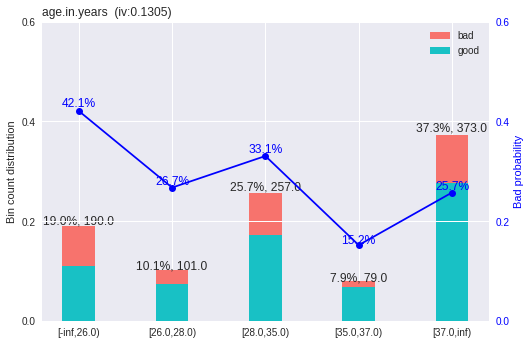

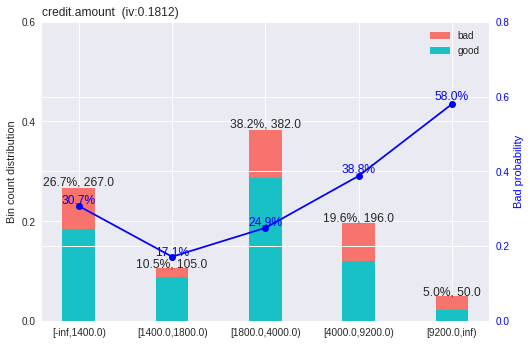

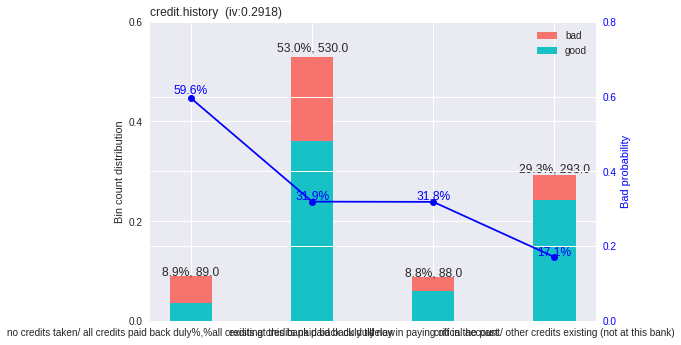

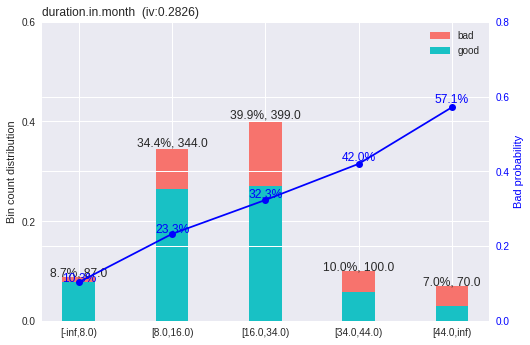

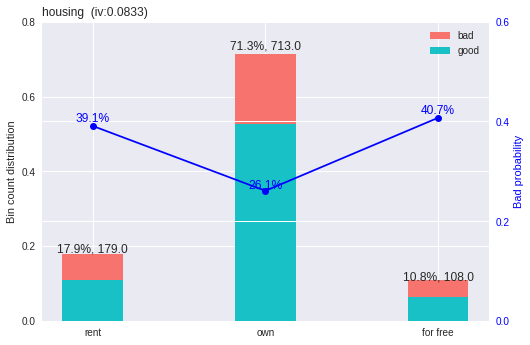

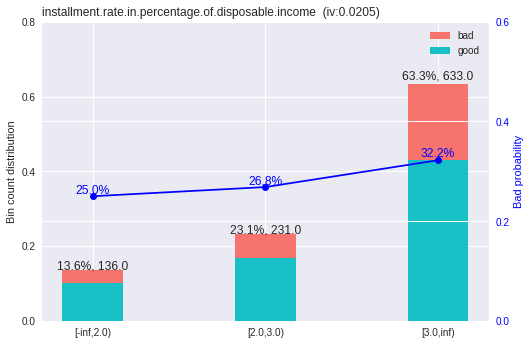

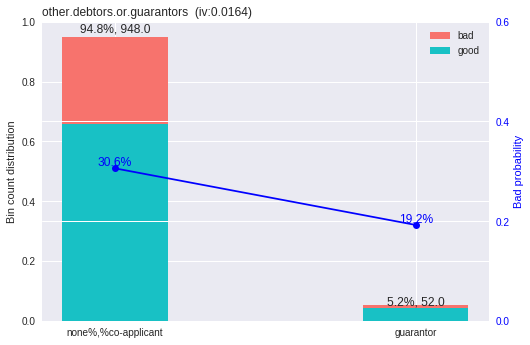

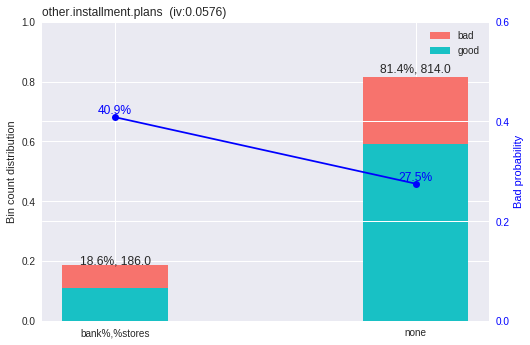

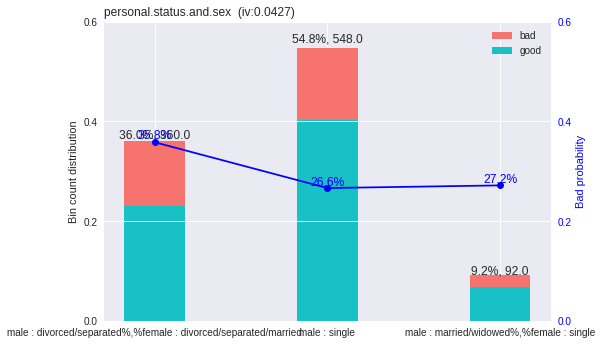

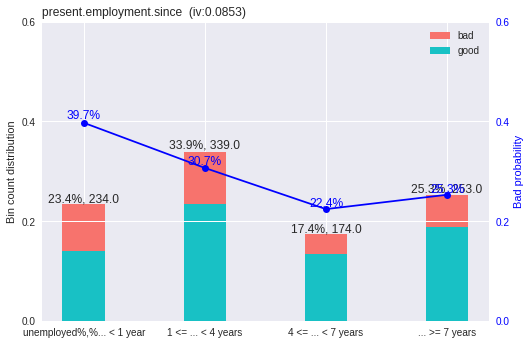

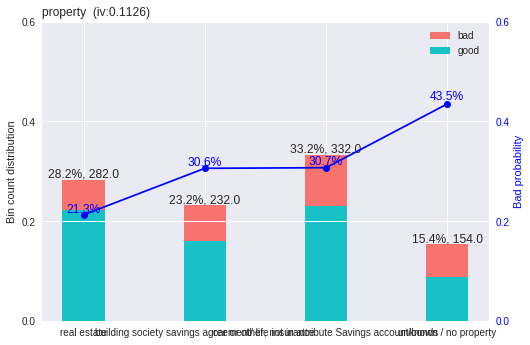

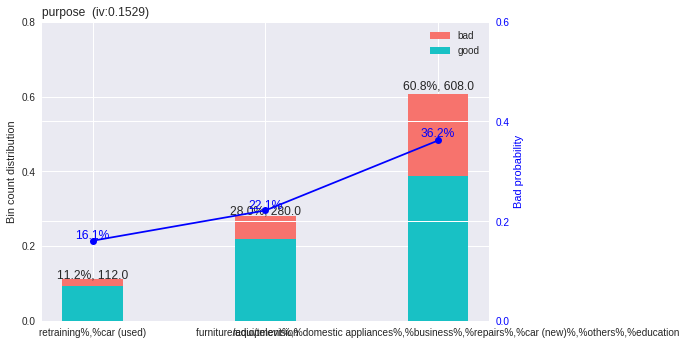

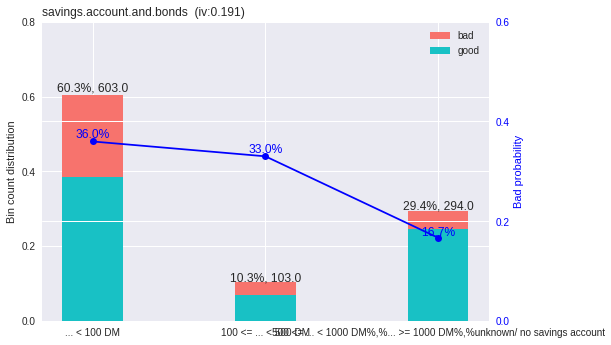

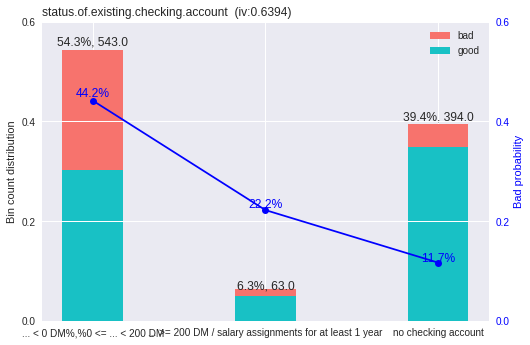

In [0]:
sc.woebin_plot(bins)

woebin_plot绘制分箱信息图。合理的分箱应有以下特征：

* 坏客户率或者WOE值趋势线，最多不超过一个拐点，最好是单调的
* 每个分箱的样本数量占比最好大于5%

#### 5.1 分箱调整

scorecardpy提供了手动调整分箱和交互式的调整。

In [0]:
#交互式调整
breaks_adj = sc.woebin_adj(dt_s, "creditability", bins) 

In [0]:
breaks_adj = {
    'age.in.years': [26, 35, 40],
    'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"]
}
bins_adj = sc.woebin(dt_s, y="creditability", breaks_list=breaks_adj)

#### 5.2 分箱woe转换

In [0]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

In [0]:
y_train = train_woe.loc[:,'creditability']
X_train = train_woe.loc[:,train_woe.columns != 'creditability']
y_test = test_woe.loc[:,'creditability']
X_test = test_woe.loc[:,train_woe.columns != 'creditability']

### 6. 逻辑回归模型计算

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

#### 6.1 ks & roc

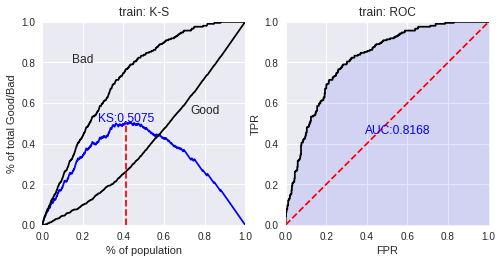

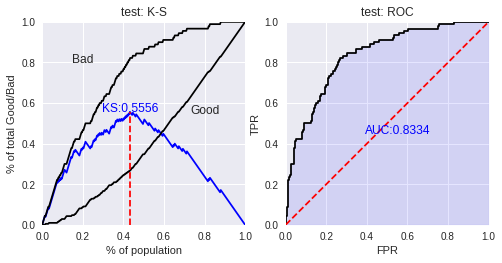

In [0]:
# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

### KS

KS(柯尔莫哥洛夫-斯米尔诺夫kolmogorov-smirnow)图纵轴为坏客户累计百分比，横轴为总体样本累计百分比。perf_eva函数绘制KS曲线过程:
* 先将样本随机排列，随机种子seed默认为186
* 按照预测违约概率倒序排列(坏客户累计百分比曲线位于上方)分为groupnum(默认20)等份计算每一等份中违约与正常客户的累计百分比
* 绘制出两者之间差值即为KS曲线

KS曲线中的最大值即为KS值，其取值范围0~1。KS值越大模型的区分能力越好。

通常申请评分卡要求KS ≥ 0.3。而且测试集与训练集的KS值相差小于0.01。

### ROC与AUC

ROC(受试者工作特征曲线Receiver Operating Charactersitic)曲线纵轴为真正例率(True Positive Rate, TPR)，横轴为假正例率(False Positive Rate, FPR)：
* 先将样本随机排列，随机种子seed默认为186
* 按照预测违约概率降序排列
* 分概率值计算好坏客户数量，然后计算TPR=TP/(TP+FN)与FPR=FP/(TN+FP) 以TPR为纵轴FPR为横轴绘制散点图即为ROC曲线

AUC(Area Under ROC Curve)为ROC曲线下面积之和，其取值范围0~1。

AUC值越大模型效果越好。
行为评分卡通常要求AUC ≥0.75，申请评分卡的AUC相对低一些也能够接受。

### 7. 刻度转换

In [0]:
# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)

scorecard函数创建评分卡刻度，其默认设置points0=600, odds0=1/19, pdo=50


Signature:
sc.scorecard(
    ['bins', 'model', 'xcolumns', 'points0=600', 'odds0=0.05263157894736842', 'pdo=50', 'basepoints_eq0=False'],
)
Docstring:
Creating a Scorecard
------
`scorecard` creates a scorecard based on the results from `woebin` 
and LogisticRegression of sklearn.linear_model

Params
------
bins: Binning information generated from `woebin` function.
model: A LogisticRegression model object.
points0: Target points, default 600.
odds0: Target odds, default 1/19. Odds = p/(1-p).
pdo: Points to Double the Odds, default 50.
basepoints_eq0: Logical, default is FALSE. If it is TRUE, the 
  basepoints will equally distribute to each variable.

Returns
------
DataFrame
    scorecard dataframe

Examples
------
import scorecardpy as sc

# load data
dat = sc.germancredit()

# filter variable via missing rate, iv, identical value rate
dt_sel = sc.var_filter(dat, "creditability")

# woe binning ------
bins = sc.woebin(dt_sel, "creditability")
dt_woe = sc.woebin_ply(dt_sel, bins)

y = dt_woe.loc[:,'creditability']
X = dt_woe.loc[:,dt_woe.columns != 'creditability']

# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga')
lr.fit(X, y)

# # predicted proability
# dt_pred = lr.predict_proba(X)[:,1]
# # performace
# # ks & roc plot
# sc.perf_eva(y, dt_pred)

# scorecard
# Example I # creat a scorecard
card = sc.scorecard(bins, lr, X.columns)

# credit score
# Example I # only total score
score1 = sc.scorecard_ply(dt_sel, card)
# Example II # credit score for both total and each variable
score2 = sc.scorecard_ply(dt_sel, card, only_total_score = False)
File:      c:\anaconda3\lib\site-packages\scorecardpy\scorecard.py
Type:      function

In [0]:
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


### 8.稳定性指数

稳定性指数(population stability index, PSI)是计算实际和预期的分值分布之间差异的一个衡量指标。

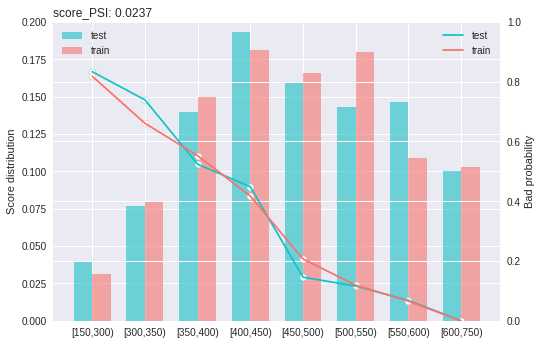

{'pic': {'score': <matplotlib.figure.Figure at 0x7f20f3f5b668>},
 'psi':   variable       PSI
 0    score  0.023746}

In [0]:
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

**perf_psi函数计算两个样本的评分稳定性指数并绘制评分分布图。如果参数score输入多个评分或多个变量的评分，能够同时返回相应的稳定性指数。**

稳定性指数PSI与信息值的计算公式相同。信息值衡量的是两个离散变量之间的关联性，较低的取值表明两个变量的类别分布相似。信用评分卡使用稳定性指数遵循的准则如下：

指数范围	解释

0~0.1	无显著变化，无须采取行动

0.1~0.25	发现某些变化，建议进行检查

大于0.25	发现显著变化，建议重新建立评分卡


稳定性指数可以用于以下三个目的：

* 作为验证统计量，以确保训练数据集与测试数据集得到的评分分布之间没有显著差异。
* 作为监控评分卡实施以后表现的控制措施。如果稳定性指数表明发生显著变化，需要调查原因，必要时甚至需要重建评分卡。
* 还可以监测预测变量的评分分布是否发生变化。